In [1]:
from read_data import *
from hyper import *
from alignment import *
from copy import *
from datasets.preprecossing import *
import rpy2
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster import hierarchy
from math import sin,cos,pi
import scipy 
from sklearn.metrics import adjusted_rand_score

import seaborn as sns
argk = 5
folder_path = './datas/zise/'
# folder_path2 = './datas/ohss/'
subsize = 20
pcanum = 20
tempnum = 1000

In [103]:
datas = sc.read_h5ad("./datas/nature/151507_preprocessed.h5")
datas[datas.obs[datas.obs['layer_guess_reordered']=='Layer1'].index]

View of AnnData object with n_obs × n_vars = 817 × 9948
    obs: 'in_tissue', 'array_row', 'array_col', 'imagerow', 'imagecol', 'sum_umi', 'sum_gene', 'subject', 'position', 'replicate', 'discard', 'cell_count', 'layer_guess', 'layer_guess_reordered', 'layer_guess_reordered_short', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts'
    uns: 'layer_guess_reordered_colors'
    obsm: 'spatial'

In [2]:
# datas = sc.read_h5ad("./datas/nature/151507_preprocessed.h5")
# adata_subset = datas[:tempnum,:]
datas = sc.read_h5ad("./datas/nature/151507_preprocessed.h5")
datas = datas[datas.obs[datas.obs['layer_guess_reordered']!='Layer5'].index]
sc.write('./datas/nature/zise.h5',datas)
datas = sc.read_h5ad("./datas/nature/zise.h5")
indices = np.random.choice(datas.n_obs, size=subsize, replace=False)


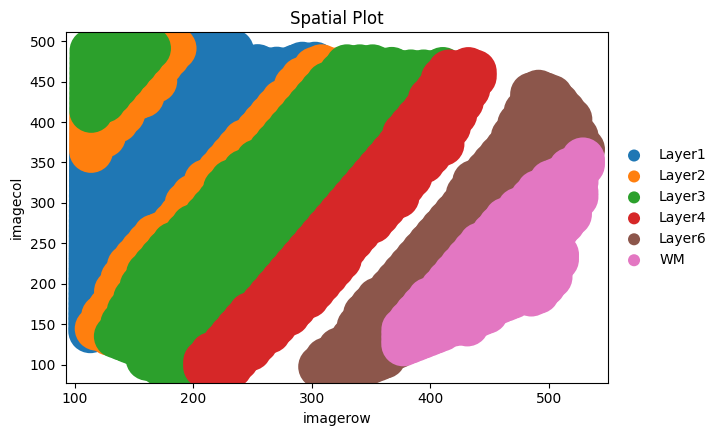

In [4]:
sc.pl.scatter(datas,'imagerow', 'imagecol', color='layer_guess_reordered', title='Spatial Plot',size=4000)

In [5]:
count_sub = datas.to_df()
xy_coords = pd.DataFrame(datas.obsm['spatial'],columns=['imagerow','imagecol'],index= datas.obs.index)
xy_coords.to_csv(folder_path+"xy.csv")
datas.obs.to_csv(folder_path+'meta_data.csv');
count_sub.T.to_csv(folder_path+"gene.csv")

In [6]:
# robjects.r("load(paste0('./datas/pca/DLPFC/LIBD_sample1.RData'))")
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects

Spatialpc  = importr('SpatialPCA')
ggplot2 = importr('ggplot2')
scran = importr('scran')
bluster = importr('bluster')
matrix = importr('Matrix')
robjects.r("xy_coords <- read.csv('{}',row.names='X')".format(folder_path + 'xy.csv'))
robjects.r("xy_coords=as.matrix(xy_coords)")
robjects.r("count_temp <- read.csv('{}',row.names='X')".format(folder_path + 'gene.csv'))
robjects.r('my_matrix <- do.call(cbind, count_temp)')
robjects.r('my_sparse_matrix <- Matrix(my_matrix, sparse = TRUE)')
robjects.r('count_sub <- as(my_sparse_matrix, "dgCMatrix")')
robjects.r('rownames(count_sub) <- rownames(count_temp)')
robjects.r("rownames(xy_coords) = colnames(count_sub)");
robjects.r('LIBD = CreateSpatialPCAObject(counts=count_sub, location=xy_coords, project = "SpatialPCA",gene.type="spatial",sparkversion="spark",numCores_spark=5,gene.number=3000, customGenelist=NULL,min.loctions = 20, min.features=20)')
robjects.r('LIBD = SpatialPCA_buildKernel(LIBD, kerneltype="gaussian", bandwidthtype="SJ",bandwidth.set.by.user=NULL)')
robjects.r('LIBD = SpatialPCA_EstimateLoading(LIBD,fast=FALSE,SpatialPCnum={})'.format(pcanum))
robjects.r('LIBD = SpatialPCA_SpatialPCs(LIBD, fast=FALSE)')
robjects.r('write.csv(as.data.frame(LIBD@SpatialPCs), file = "{}")'.format(folder_path + "pca.csv"))
robjects.globalenv.clear()



    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    ## Use SCTransform function in Seurat to normalize data. 


R[write to console]: Calculating cell attributes from input UMI matrix: log_umi

R[write to console]: Variance stabilizing transformation of count matrix of size 9948 by 3546

R[write to console]: Model formula is y ~ log_umi

R[write to console]: Get Negative Binomial regression parameters per gene

R[write to console]: Using 2000 genes, 3546 cells



  |======================================================================| 100%


R[write to console]: Found 42 outliers - those will be ignored in fitting/regularization step


R[write to console]: Second step: Get residuals using fitted parameters for 9948 genes



  |======================================================================| 100%


R[write to console]: Computing corrected count matrix for 9948 genes



  |======================================================================| 100%


R[write to console]: Calculating gene attributes

R[write to console]: Wall clock passed: Time difference of 35.77184 secs

R[write to console]: Determine variable features

R[write to console]: Place corrected count matrix in counts slot

R[write to console]: Centering data matrix

  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |=====                                                                 |   7%
  |                                                                            
  |==========                                                            |  14%
  |                                                                            
  |===============                                                       |  21%
  |                                                                         

## Use spark.test function in SPARK package to select spatially variable genes. 
## ===== SPARK INPUT INFORMATION ==== 
## number of total samples:  3546 
## number of total features:  3834 
## number of adjusted covariates:  0 
# fitting normalized count-based spatial model under the null hypothesis ... 
## testing Gaussian kernel: 1...
## testing Periodic kernel: 1...
## testing Gaussian kernel: 2...
## testing Periodic kernel: 2...
## testing Gaussian kernel: 3...
## testing Periodic kernel: 3...
## testing Gaussian kernel: 4...
## testing Periodic kernel: 4...
## testing Gaussian kernel: 5...
## testing Periodic kernel: 5...
## Identified  1147  spatial genes through spark.test function. 
The  number of significant spatial genes is less than the specified number of spatial genes. 
## Using  1147  significant spatially variable genes. 
## Selected kernel type is:  gaussian  
## The bandwidth is:  0.0420922200922653  
## Calculating kernel matrix
## Finished calculating kernel matrix

In [7]:
adata1 = pd.read_csv(folder_path + 'pca.csv')
adata1 = adata1.set_index(adata1.columns[0])
adata1 = adata1.T
adata1.index = datas.obs.layer_guess_reordered
adata1
# adata1.to_csv(folder_path+'datas.data',header=None);
# adata1.to_csv(folder_path+'datas.csv')

Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
layer_guess_reordered,,,,,,,,,,,,,,,,,,,,
Layer1,-1.562363,0.154360,-0.494487,2.377730,-0.376938,-3.956285,1.956953,-0.587198,0.484087,0.085032,-2.387393,0.186985,-0.250916,0.262839,-0.559286,0.093041,-0.879110,-1.160672,-1.372322,1.236706
Layer3,4.267243,-0.752564,1.558647,-0.667379,0.682970,1.260554,0.123158,-0.403639,0.503338,-0.731068,0.457025,0.982430,-0.130120,0.479670,-0.274192,0.070653,0.558355,0.284212,0.833115,0.018808
Layer1,-7.333530,8.663573,2.121340,-3.487936,-1.692988,-0.892398,0.723950,1.619716,-0.745636,-1.795453,1.741806,0.169681,0.484542,0.062376,-0.137197,-0.415193,-0.896471,-1.509789,-0.648058,1.963885
WM,-15.378221,-8.357813,-3.138344,-4.926603,2.408113,1.070310,-1.008033,0.070260,1.469719,0.553235,0.242988,-0.104639,-0.689232,0.428692,0.143321,-1.642866,-1.834852,1.413388,-0.940609,0.735886
Layer6,2.455157,-2.009670,0.222283,0.407444,-3.683607,-1.095078,-3.309520,-1.199379,0.876598,-0.035353,2.218243,-1.235882,-0.370987,0.420996,0.736249,0.466366,-1.525906,0.254405,1.623125,-1.376353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Layer3,3.714112,1.768030,-0.596119,-2.035630,1.146595,0.121082,0.167513,-0.207793,-0.537275,0.116818,-0.557786,-0.191802,0.503995,0.480818,-0.437334,-0.294169,-1.129750,0.139625,0.036887,0.399519
Layer6,-0.382194,-3.837257,-1.522689,-0.368873,-2.602107,-0.194205,0.215208,-1.222449,-1.920214,0.770109,0.008502,0.136116,0.766578,0.426774,-0.041515,-0.075974,-0.566505,-0.041018,0.471699,0.095746
WM,-10.426399,-7.083139,-0.774583,2.644713,2.828471,-2.277614,-0.533570,-2.366139,-1.631723,-0.571090,0.165933,4.020249,0.273718,1.579666,1.864747,0.666378,2.768171,-0.784809,0.243935,1.281545


In [30]:
adata1.to_csv(folder_path+'ann.csv',index=None)

In [32]:
np.linalg.norm(adata1.iloc[0]-adata1.iloc[2666])

1.9474985587851352

In [35]:
adata1.values.shape

(3546, 20)

In [61]:
pd.DataFrame(knn_graph)

,0,1,2,3,4,5,6,7,8,9,...,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# Example data
data = adata1.values

# Number of neighbors
k = 5

# Create KNN graph
nbrs = NearestNeighbors(n_neighbors=k, algorithm='kd_tree').fit(data)
distances, indices = nbrs.kneighbors(data)

# Convert the KNN graph to a sparse matrix
n_samples = indices.shape[0]
knn_graph = csr_matrix((np.ones(n_samples * k), (np.repeat(np.arange(n_samples), k), indices.ravel())), shape=(n_samples, n_samples))
knn_graph = knn_graph.toarray()
pd.DataFrame(knn_graph).to_csv(folder_path+'knn.csv',index=None)

In [8]:
adata1.T.to_csv(folder_path+'annT.csv',index=None)

In [9]:
args=[ i+1 for i in range(100)];
steps = [i+1 for i in range(10)];
anss = [];
ansss = [];
for argk in args:
    for step in steps:
        matrix = importr('Matrix')
        # igraph = importr('igraph')
        robjects.r("library('igraph')")
        robjects.r(" xys <- read.csv('{}')".format(folder_path+'annT.csv'));
        robjects.r("g <- buildSNNGraph(xys,k={})".format(argk))
        robjects.r("walktrap <- walktrap.community(g,steps={})".format(step))
        robjects.r("clusters <- membership(walktrap)")
        robjects.r("write.csv(clusters,file='{}')".format(folder_path+'cluster.csv'))
        robjects.globalenv.clear()
        meta1 = pd.read_csv(folder_path+'cluster.csv')
        meta1 = meta1.set_index(meta1.columns[0])
        meta1['x'].tolist()
        ari = adjusted_rand_score(meta1['x'].tolist(), datas.obs['layer_guess_reordered'].tolist())
        print("ARI score for {},{}: ".format(argk,step), ari)
        # datas.obs['julei']= meta1['x'].tolist()
        # sc.pl.scatter(datas,'imagerow', 'imagecol', color='julei', title='Spatial Plot',size=4000)
        anss.append(ari)

        ansss.append(meta1['x'].tolist())

R[write to console]: 
Attaching package: ‘igraph’


R[write to console]: The following object is masked from ‘package:GenomicRanges’:

    union


R[write to console]: The following object is masked from ‘package:IRanges’:

    union


R[write to console]: The following object is masked from ‘package:S4Vectors’:

    union


R[write to console]: The following objects are masked from ‘package:BiocGenerics’:

    normalize, path, union


R[write to console]: The following objects are masked from ‘package:stats’:

    decompose, spectrum


R[write to console]: The following object is masked from ‘package:base’:

    union




ARI score for 1,1:  0.007197527900326945
ARI score for 1,2:  0.007197527900326945
ARI score for 1,3:  0.007197527900326945
ARI score for 1,4:  0.007197527900326945
ARI score for 1,5:  0.007197527900326945
ARI score for 1,6:  0.007197527900326945
ARI score for 1,7:  0.007197527900326945
ARI score for 1,8:  0.007197527900326945
ARI score for 1,9:  0.007197527900326945
ARI score for 1,10:  0.007197527900326945
ARI score for 2,1:  0.05264953626505842
ARI score for 2,2:  0.07224763688331554
ARI score for 2,3:  0.08652108970791839
ARI score for 2,4:  0.086776460590219
ARI score for 2,5:  0.08697085505059132
ARI score for 2,6:  0.11322254408525827
ARI score for 2,7:  0.10124961721852661
ARI score for 2,8:  0.10010085725830026
ARI score for 2,9:  0.10540047423736053
ARI score for 2,10:  0.10531125095823876
ARI score for 3,1:  0.13584224623816663
ARI score for 3,2:  0.14400681206241
ARI score for 3,3:  0.14673539369692695
ARI score for 3,4:  0.15884508989034754
ARI score for 3,5:  0.15492694123

In [11]:
np.array(anss).max()

0.6926462983772753

In [27]:
(np.array(ansss[indexss])-1).astype('str')

array(['0', '2', '0', ..., '1', '3', '0'], dtype='<U21')

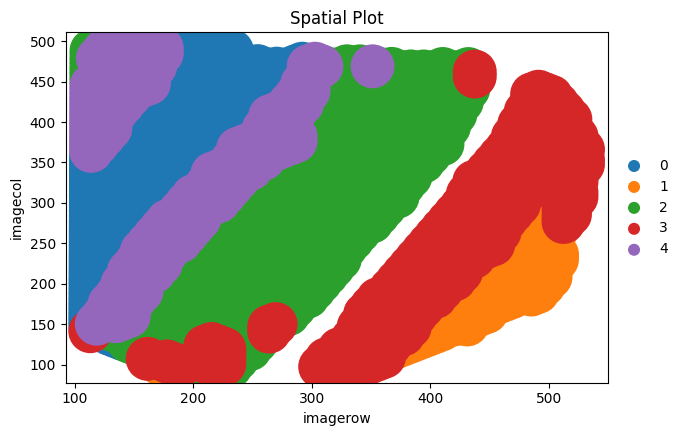

In [28]:
indexss= anss.index(np.array(anss).max())
datas.obs['julei']= (np.array(ansss[indexss])-1).astype('str')
sc.pl.scatter(datas,'imagerow', 'imagecol', color='julei', title='Spatial Plot',size=4000)

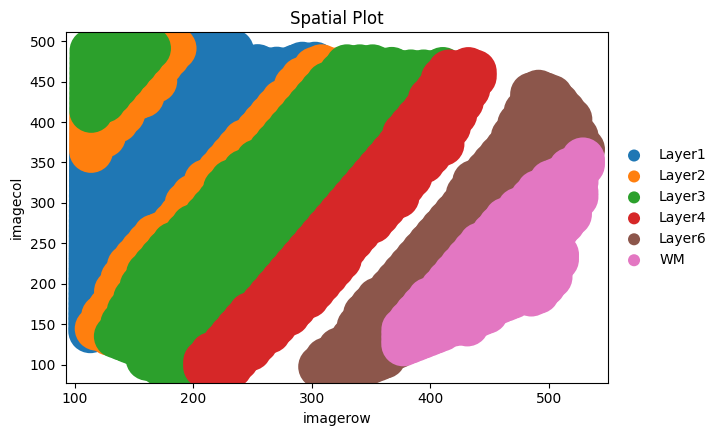

In [13]:
sc.pl.scatter(datas,'imagerow', 'imagecol', color='layer_guess_reordered', title='Spatial Plot',size=4000)

In [14]:
indexss

888

In [15]:
adata1.to_csv(folder_path+"datas.data",header=None);
adata1.to_csv(folder_path+"datas.csv");

./datas/zise/datas.data length:3546
Generating all pairs subset


100%|██████████| 1563/1563 [01:08<00:00, 22.75ex/s, loss=1.088502] 


	 Epoch 0 | average train loss: 1.022722
Optimization finished.


100%|██████████| 1563/1563 [01:04<00:00, 24.36ex/s, loss=1.011376] 


	 Epoch 1 | average train loss: 1.009591
Optimization finished.


100%|██████████| 1563/1563 [01:04<00:00, 24.07ex/s, loss=0.907354] 


	 Epoch 2 | average train loss: 0.987432
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.87ex/s, loss=0.883086] 


	 Epoch 3 | average train loss: 0.966382
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 24.01ex/s, loss=0.952823] 


	 Epoch 4 | average train loss: 0.949422
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.98ex/s, loss=0.816310] 


	 Epoch 5 | average train loss: 0.935455
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 24.03ex/s, loss=0.785409] 


	 Epoch 6 | average train loss: 0.935906
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 24.03ex/s, loss=0.930207] 


	 Epoch 7 | average train loss: 0.925712
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 24.03ex/s, loss=0.846890] 


	 Epoch 8 | average train loss: 0.917519
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 24.02ex/s, loss=0.910578] 


	 Epoch 9 | average train loss: 0.910668
Optimization finished.


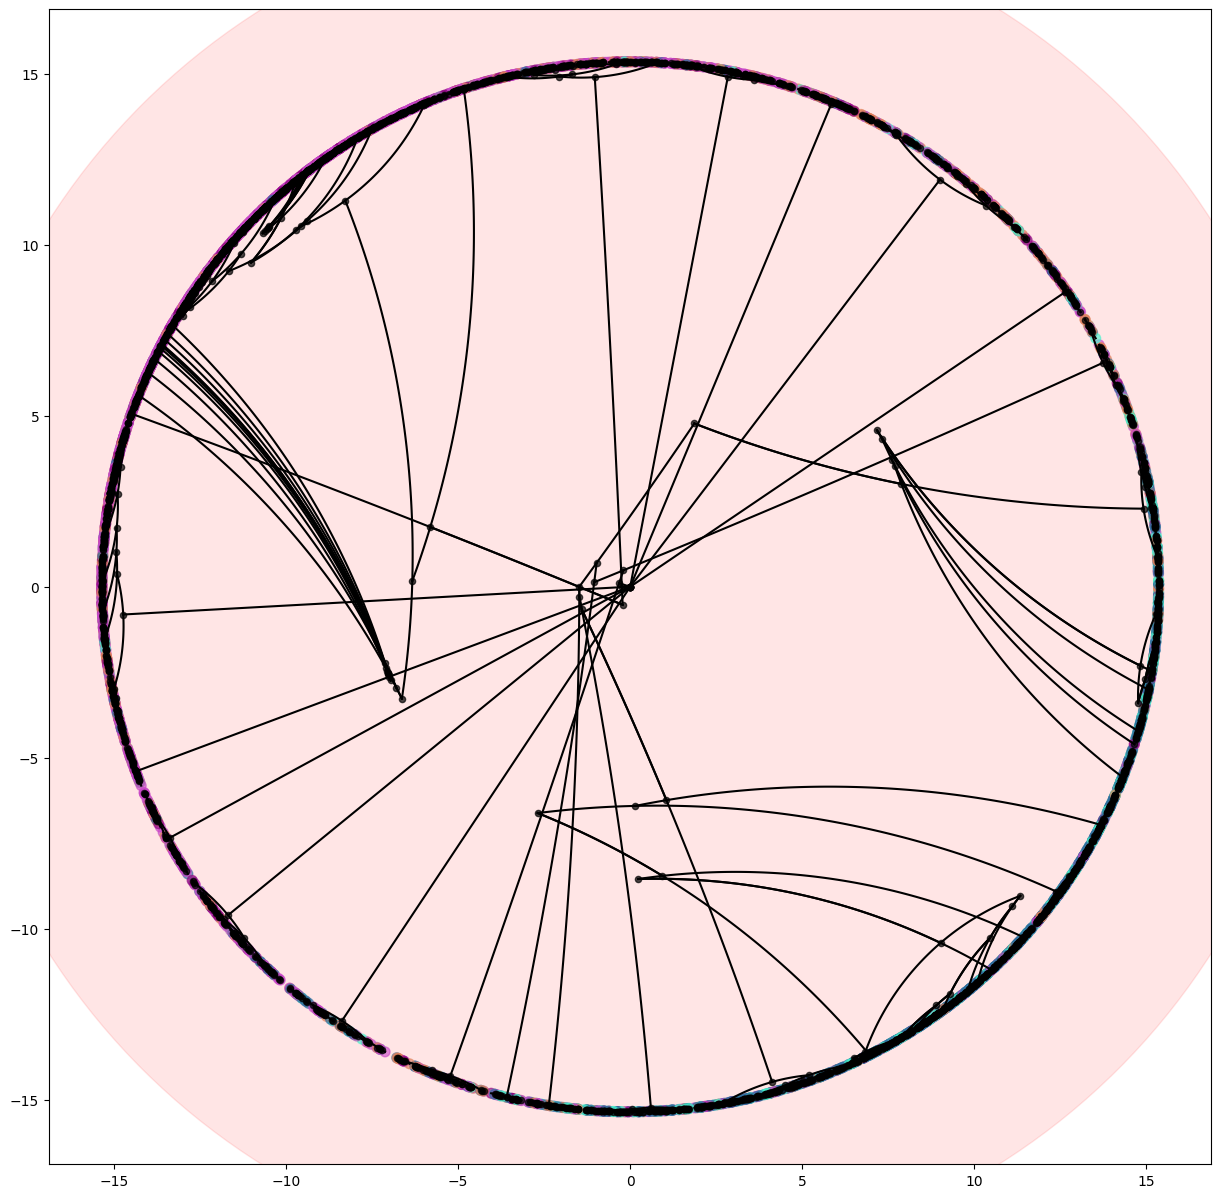

In [16]:
get_Hyper_tree(folder_path+'datas.data',1,adata1.shape[1]+1,0,10,model_path=None,save_path=folder_path,c=-1)


./datas/zise/datas.data length:3546
Generating all pairs subset


100%|██████████| 1563/1563 [01:05<00:00, 23.68ex/s, loss=1.088502] 


	 Epoch 0 | average train loss: 1.022722
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.89ex/s, loss=1.011376] 


	 Epoch 1 | average train loss: 1.009591
Optimization finished.


100%|██████████| 1563/1563 [01:04<00:00, 24.12ex/s, loss=0.907354] 


	 Epoch 2 | average train loss: 0.987432
Optimization finished.


100%|██████████| 1563/1563 [01:06<00:00, 23.68ex/s, loss=0.883086] 


	 Epoch 3 | average train loss: 0.966382
Optimization finished.


100%|██████████| 1563/1563 [01:04<00:00, 24.05ex/s, loss=0.952823] 


	 Epoch 4 | average train loss: 0.949422
Optimization finished.


100%|██████████| 1563/1563 [01:06<00:00, 23.64ex/s, loss=0.816310] 


	 Epoch 5 | average train loss: 0.935455
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 24.00ex/s, loss=0.785409] 


	 Epoch 6 | average train loss: 0.935906
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.72ex/s, loss=0.930207] 


	 Epoch 7 | average train loss: 0.925712
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.73ex/s, loss=0.846890] 


	 Epoch 8 | average train loss: 0.917519
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.75ex/s, loss=0.910578] 


	 Epoch 9 | average train loss: 0.910668
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.98ex/s, loss=1.050833] 


	 Epoch 10 | average train loss: 0.905343
Optimization finished.


100%|██████████| 1563/1563 [01:04<00:00, 24.08ex/s, loss=0.935696] 


	 Epoch 11 | average train loss: 0.901376
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.72ex/s, loss=0.955960] 


	 Epoch 12 | average train loss: 0.897378
Optimization finished.


100%|██████████| 1563/1563 [01:06<00:00, 23.55ex/s, loss=0.770077] 


	 Epoch 13 | average train loss: 0.893912
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.81ex/s, loss=0.907675] 


	 Epoch 14 | average train loss: 0.890746
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.74ex/s, loss=0.827203] 


	 Epoch 15 | average train loss: 0.887435
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.75ex/s, loss=0.930310] 


	 Epoch 16 | average train loss: 0.885425
Optimization finished.


100%|██████████| 1563/1563 [01:06<00:00, 23.62ex/s, loss=0.824989] 


	 Epoch 17 | average train loss: 0.883598
Optimization finished.


100%|██████████| 1563/1563 [01:06<00:00, 23.57ex/s, loss=0.744939] 


	 Epoch 18 | average train loss: 0.882082
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 24.02ex/s, loss=0.975106] 


	 Epoch 19 | average train loss: 0.880587
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 24.00ex/s, loss=1.052426] 


	 Epoch 20 | average train loss: 0.879512
Optimization finished.


100%|██████████| 1563/1563 [01:07<00:00, 23.20ex/s, loss=0.985403] 


	 Epoch 21 | average train loss: 0.878221
Optimization finished.


100%|██████████| 1563/1563 [01:07<00:00, 23.00ex/s, loss=1.081142] 


	 Epoch 22 | average train loss: 0.877074
Optimization finished.


100%|██████████| 1563/1563 [01:09<00:00, 22.60ex/s, loss=0.733407] 


	 Epoch 23 | average train loss: 0.875773
Optimization finished.


100%|██████████| 1563/1563 [01:08<00:00, 22.81ex/s, loss=0.976879] 


	 Epoch 24 | average train loss: 0.875994
Optimization finished.


100%|██████████| 1563/1563 [01:08<00:00, 22.70ex/s, loss=0.935764] 


	 Epoch 25 | average train loss: 0.875035
Optimization finished.


100%|██████████| 1563/1563 [01:07<00:00, 23.31ex/s, loss=0.957798] 


	 Epoch 26 | average train loss: 0.875030
Optimization finished.


100%|██████████| 1563/1563 [01:07<00:00, 23.22ex/s, loss=0.951264] 


	 Epoch 27 | average train loss: 0.874364
Optimization finished.


100%|██████████| 1563/1563 [01:06<00:00, 23.60ex/s, loss=0.856344] 


	 Epoch 28 | average train loss: 0.873389
Optimization finished.


100%|██████████| 1563/1563 [01:05<00:00, 23.95ex/s, loss=0.982804] 


	 Epoch 29 | average train loss: 0.872642
Annealing learning rate to: 0.00025
Optimization finished.


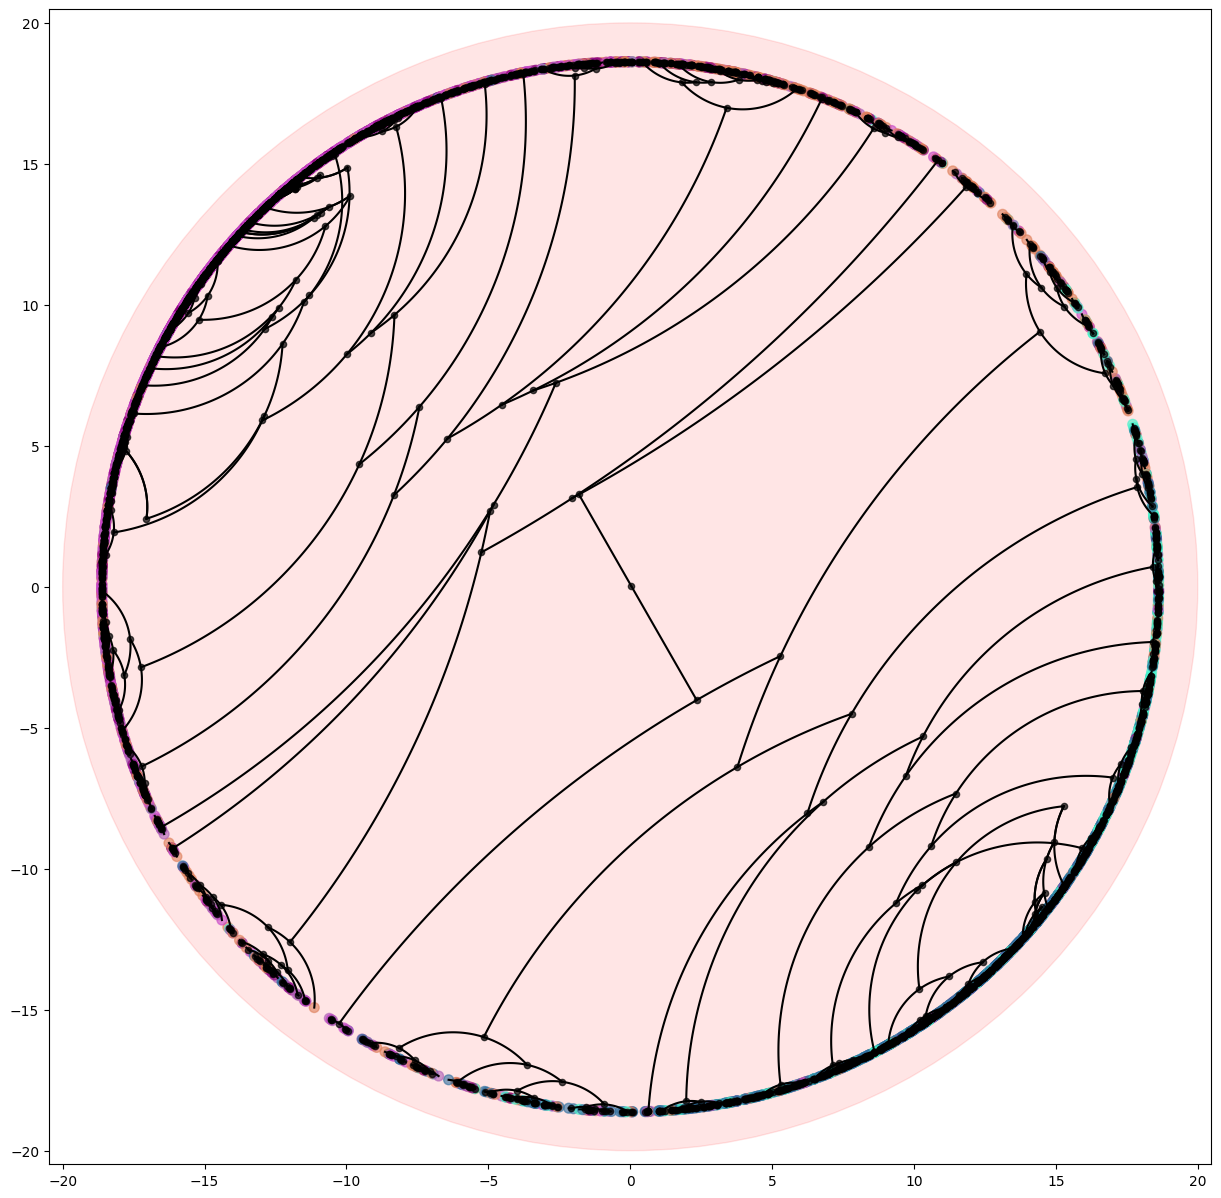

In [17]:
get_Hyper_tree(folder_path+'datas.data',1,adata1.shape[1]+1,0,30,model_path=None,save_path=folder_path,c=-1)


In [18]:
adata1.index = ansss[indexss]
adata1.groupby(adata1.index).mean()

Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,-4.643609,5.235603,0.710370,-0.091656,-0.390331,0.063050,0.156757,-0.217924,-0.122154,-0.098003,-0.051746,-0.008065,-0.022950,0.056230,0.092143,-0.069511,-0.075998,0.177146,-0.096435,0.029175
2,-10.085926,-5.781899,-1.635960,-0.491239,1.555511,-0.282499,-0.366065,-0.362604,-0.122263,-0.070330,0.215410,0.238267,0.510377,-0.288239,0.016943,0.115484,0.016358,-0.000590,-0.076377,-0.073691
3,3.653288,-0.064636,0.667958,-0.669627,1.173794,0.115642,0.044847,-0.183798,0.103999,-0.073755,0.265359,0.111028,-0.082284,-0.091692,0.006659,0.045516,-0.173489,0.087751,-0.068194,0.034198
4,0.670720,-3.420230,-0.040315,0.593113,-2.575047,0.179604,-0.682585,0.309109,-0.218800,0.189726,0.232017,0.033658,-0.129723,0.018341,-0.082969,0.003131,-0.180224,0.031056,-0.097514,0.031883
5,3.551130,2.820799,-4.431456,0.196924,0.278035,-0.201242,0.032243,0.048870,-0.121312,-0.172673,-0.278913,-0.357709,0.152638,0.420616,0.096502,-0.157086,0.462019,0.119425,-0.215355,-0.007182


In [19]:
adata1.groupby(adata1.index).mean().to_csv(folder_path+"datas.data",header=None);
adata1.groupby(adata1.index).mean().to_csv(folder_path+"datas.csv");

./datas/zise/datas.data length:5
Generating all pairs superset


  0%|          | 0/1563 [00:00<?, ?ex/s]

100%|██████████| 1563/1563 [00:59<00:00, 26.11ex/s, loss=0.892970] 


	 Epoch 0 | average train loss: 0.789704
Optimization finished.


100%|██████████| 1563/1563 [00:59<00:00, 26.38ex/s, loss=0.930243] 


	 Epoch 1 | average train loss: 0.774395
Optimization finished.


100%|██████████| 1563/1563 [00:59<00:00, 26.39ex/s, loss=0.718108] 


	 Epoch 2 | average train loss: 0.772533
Optimization finished.


100%|██████████| 1563/1563 [00:59<00:00, 26.24ex/s, loss=0.806387] 


	 Epoch 3 | average train loss: 0.771233
Optimization finished.


100%|██████████| 1563/1563 [01:00<00:00, 25.96ex/s, loss=0.783187] 


	 Epoch 4 | average train loss: 0.771264
Optimization finished.


100%|██████████| 1563/1563 [01:00<00:00, 25.99ex/s, loss=0.728418] 


	 Epoch 5 | average train loss: 0.774688
Optimization finished.


100%|██████████| 1563/1563 [00:59<00:00, 26.08ex/s, loss=0.855325] 


	 Epoch 6 | average train loss: 0.773660
Optimization finished.


100%|██████████| 1563/1563 [01:00<00:00, 25.75ex/s, loss=0.797552] 


	 Epoch 7 | average train loss: 0.776239
Optimization finished.


100%|██████████| 1563/1563 [01:00<00:00, 25.75ex/s, loss=0.643677] 


	 Epoch 8 | average train loss: 0.773647
Optimization finished.


100%|██████████| 1563/1563 [01:00<00:00, 25.86ex/s, loss=0.905360] 


	 Epoch 9 | average train loss: 0.772575
Optimization finished.


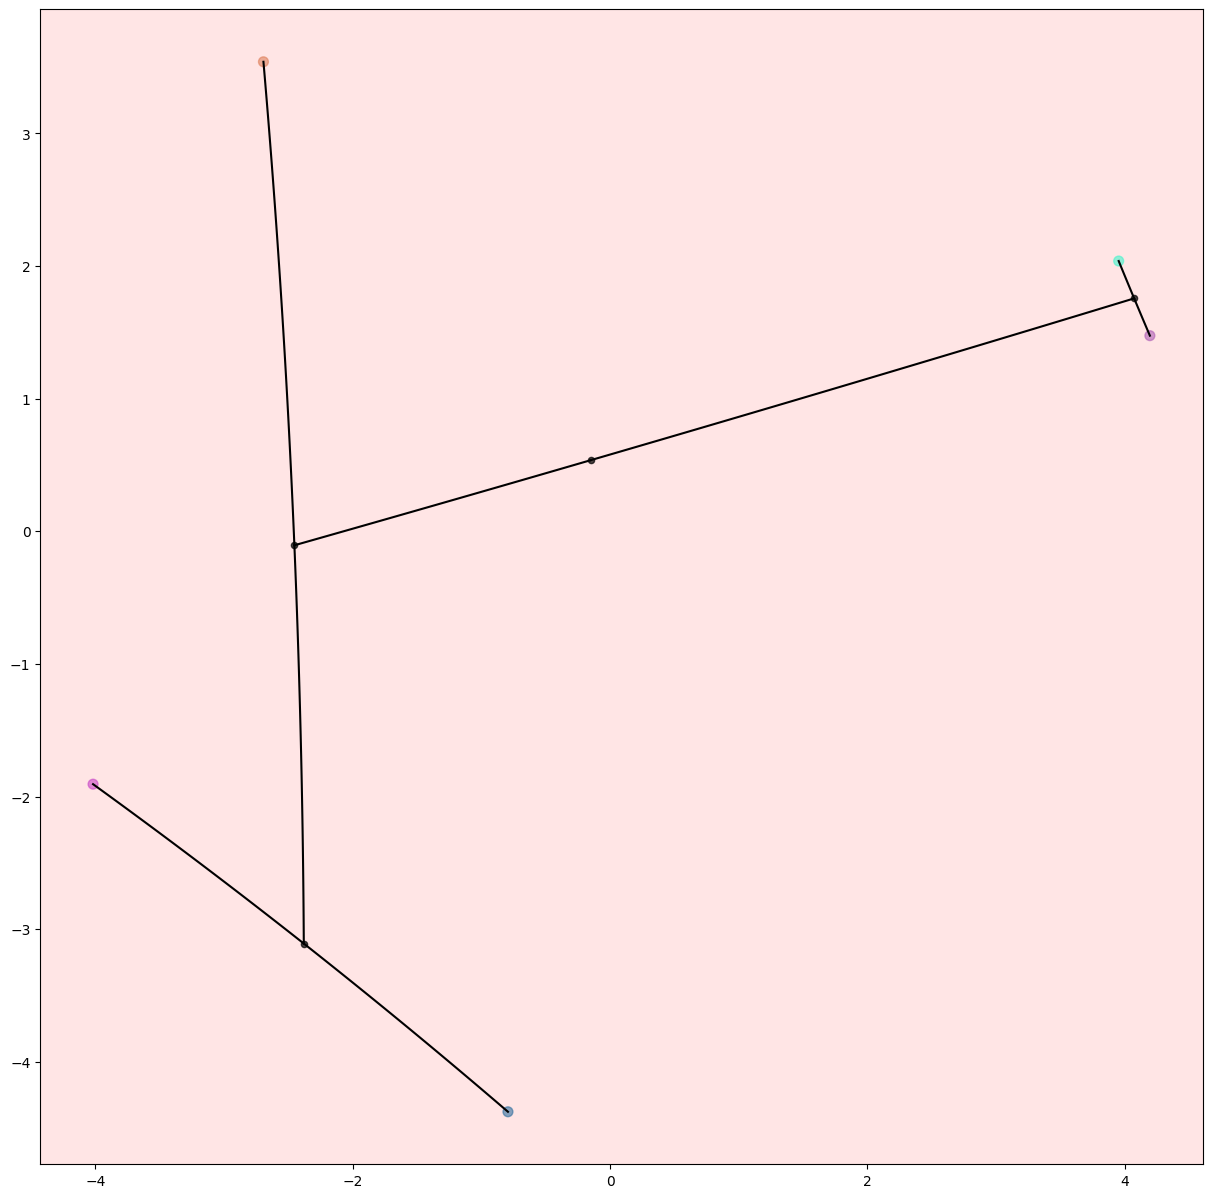

In [20]:
get_Hyper_tree(folder_path+'datas.data',1,adata1.groupby(adata1.index).mean().shape[1]+1,0,10,model_path=None,save_path=folder_path,c=-1)


In [21]:
def search_tree(now,c,merge_list):
    if(len(now.son) != 2):
        return now;
    lson = search_tree(now.son[0],c,merge_list);
    now.son[0] = lson;
    rson = search_tree(now.son[1],c,merge_list);
    now.son[1] = rson

    if(np.linalg.norm(lson.value-rson.value)<=c):
        if(len(lson.son)>1 and len(rson.son)>1):
            pass
        elif(len(lson.son)>1):
            merge_list.append((rson.name,lson.name))
            print(rson.name,lson.name)
            now = rson.copy();
            now.son=[]

            if(len(rson.son)==0):
                now.son.append(lson);
            else:
                now.son.append(lson);
                now.son.append(rson.son);
            # now.son.append(lson);
        else:
            merge_list.append((rson.name,lson.name))
            print(rson.name,lson.name)
            now = lson.copy();
            now.son=[]
            if(len(lson.son)==0):
                now.son.append(rson);
            else:
                now.son.append(lson.son);
                now.son.append(rson);
    return now;

In [22]:
def search_miss_node(now,anslist,smalllist,n):
    if(len(now.son) == 0):
        return now;
    if(len(now.son)==1):
        search_miss_node(now.son[0],anslist,smalllist,n);
        return now;
    lson = search_miss_node(now.son[0],anslist,smalllist,n);
    rson = search_miss_node(now.son[1],anslist,smalllist,n);
    if((int(lson.name)<n and int(rson.name)>n )):
        smalllist.append(int(lson.name))
        anslist.append((lson,rson));
    elif (int(lson.name)>n and int(rson.name)<n ):
        smalllist.append(int(rson.name))
        anslist.append((lson,rson));
    return now
nodes1,n1 = build_hyper_tree(folder_path)
# show_tree(nodes1[0]).show_fig()
anslist = [];
mergelist= []
smalllist = []
search_tree(nodes1[0],1,mergelist)
search_miss_node(nodes1[0],anslist,smalllist,(n1+1)/2)
len(anslist),len(mergelist)
show_tree(nodes1[0]).show_fig()
